# Hacker Earth Machine Learning Challenge 1
#### <font color = blue> Problem Statement </font>

The Bank Indessa has not done well in last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.

After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.

This bank uses a pool of investors to sanction their loans. For example: If any customer has applied for a loan of $20000, along with bank, the investors perform a due diligence on the requested loan application. Keep this in mind while understanding data.

In this challenge, you will help this bank by predicting the probability that a member will default.



In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score,accuracy_score, classification_report
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
dfTrain = pd.read_csv('train_indessa.csv')
dfTest = pd.read_csv('test_indessa.csv')

### Exploratory Data Analysis

In [4]:
df=dfTrain.copy()

In [5]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [6]:
df.tail()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
532423,31296187,20000,20000,20000.0,36 months,,12.49,B,B5,Registered Nurse,10+ years,MORTGAGE,75000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,481xx,MI,14.53,0.0,0.0,NaN,51.0,12.0,1.0,15775.0,63.6,34.0,f,2595.45,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,65th week,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60 months,BAT2003848,14.99,C,C5,Account Mgr,10+ years,MORTGAGE,59000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,496xx,MI,22.97,0.0,0.0,NaN,81.0,10.0,1.0,9453.0,53.1,29.0,w,2182.92,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60 months,NaN,20.80,E,E1,Comcast cable,8 years,RENT,42504.0,Verified,n,NaN,debt_consolidation,Debt consolidation,370xx,TN,27.27,0.0,1.0,26.0,NaN,14.0,0.0,12085.0,49.9,26.0,f,645.32,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60 months,BAT3193689,16.29,D,D2,Resident Physician,1 year,RENT,50000.0,Source Verified,n,NaN,credit_card,Credit card refinancing,432xx,OH,14.91,0.0,1.0,NaN,NaN,7.0,0.0,20902.0,89.7,14.0,w,4619.79,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,29197.0,23300.0,0
532427,46122259,10000,10000,10000.0,36 months,BAT4136152,6.39,A,A2,Health Care Analyst,< 1 year,RENT,53000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,956xx,CA,17.80,0.0,0.0,NaN,NaN,11.0,0.0,10058.0,46.4,20.0,f,467.52,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,44th week,0.0,0.0,47866.0,21700.0,0


In [8]:
# observations:
# there are a mix of numeric and category columns.
# there are missing values
# label column is loan_status

In [7]:
df.shape

(532428, 45)

In [8]:
# ML models require examples i.e. rows. A good thumb rule to use is 100 rows per column. Our dataset fits that.

In [9]:
df.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
batch_enrolled                  object
int_rate                       float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                 

In [10]:
# some columns require encoding as they are categorical

In [11]:
print(df.columns)

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')


In [12]:
#Summary statistics of numeric columns

In [13]:
print("\nSummary Statistics of Numeric Columns")
df.describe()


Summary Statistics of Numeric Columns


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,82123.000000,532412.000000,532412.000000,5.324280e+05,532141.000000,532412.000000,532428.000000,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,70.093068,11.545594,0.194858,1.692128e+04,55.057189,25.267357,1753.428788,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,28.139219,5.311442,0.583822,2.242322e+04,23.853436,11.843211,2093.199837,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.444000e+03,37.700000,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187600e+04,56.000000,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.084300e+04,73.600000,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,121.000000,90.000000,86.000000,2.568995e+06,892.300000,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [14]:
df.select_dtypes(include='object').describe()

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint,last_week_pay
count,532428,447279,532428,532428,501595,505537,532428,532428,532428,75599,532428,532338,532428,532428,532428,532428,305,532428
unique,2,104,7,35,190124,11,6,3,2,70638,14,39693,917,51,2,2,3,98
top,36 months,,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,n,> Debt consolidation<br>,debt_consolidation,Debt consolidation,945xx,CA,f,INDIVIDUAL,Not Verified,13th week
freq,372793,106079,152713,33844,8280,175105,265940,197750,532420,576,314989,248967,5845,77911,274018,532123,170,30333


In [15]:
# There are several columns with missing values.
# there may have outliers.

In [ ]:
# Step 4: Data Visualization

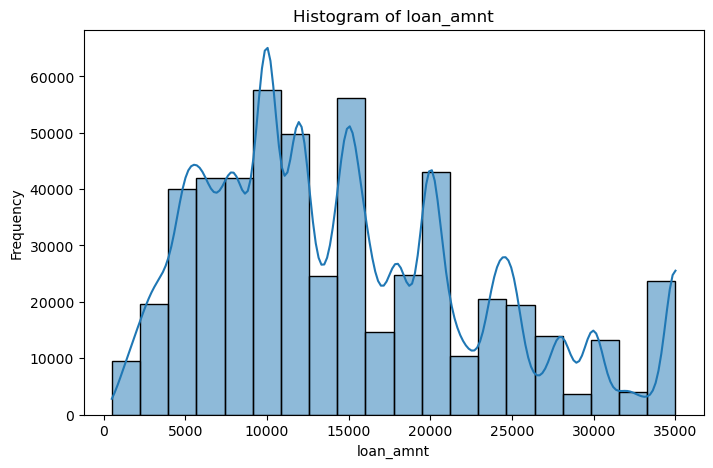

In [23]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['loan_amnt'], bins=20, kde=True)
plt.title('Histogram of loan_amnt')
plt.xlabel('loan_amnt')
plt.ylabel('Frequency')
plt.show()

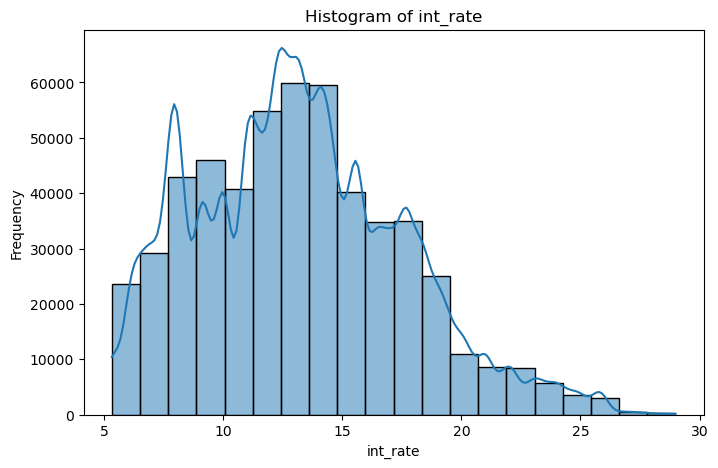

In [24]:
# Univariate Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['int_rate'], bins=20, kde=True)
plt.title('Histogram of int_rate')
plt.xlabel('int_rate')
plt.ylabel('Frequency')
plt.show()

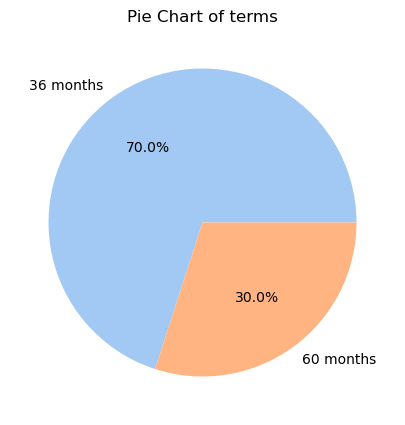

In [25]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['term'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of terms')
plt.ylabel('')
plt.show()

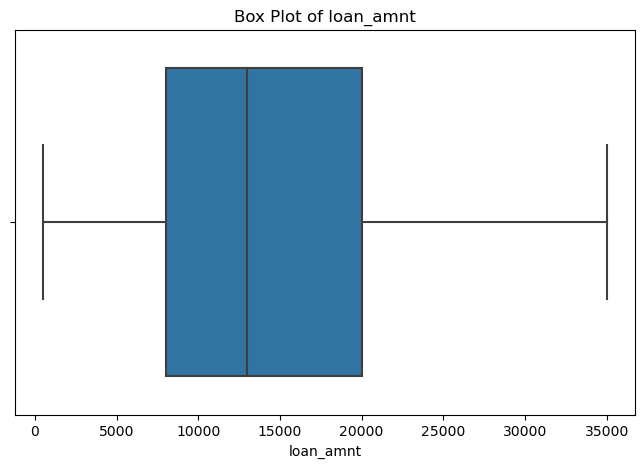

In [26]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['loan_amnt'])
plt.title('Box Plot of loan_amnt')
plt.xlabel('loan_amnt')
plt.show()

In [27]:
# No outliers in loan_amnt column

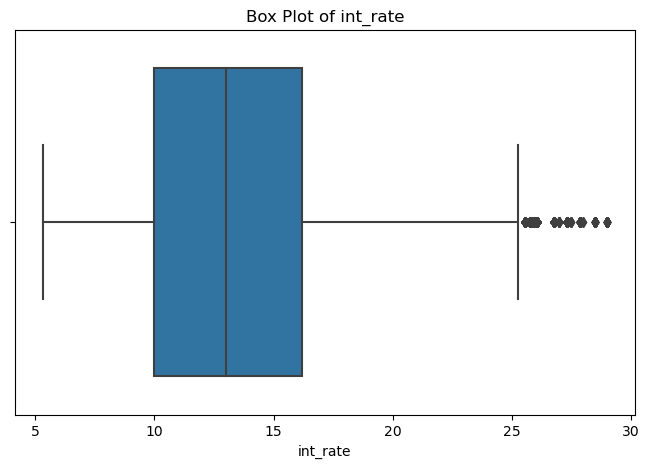

In [28]:
# Univariate Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['int_rate'])
plt.title('Box Plot of int_rate')
plt.xlabel('int_rate')
plt.show()

In [ ]:
# there are some outliers in the column: "int_rate"

<Axes: xlabel='loan_amnt', ylabel='int_rate'>

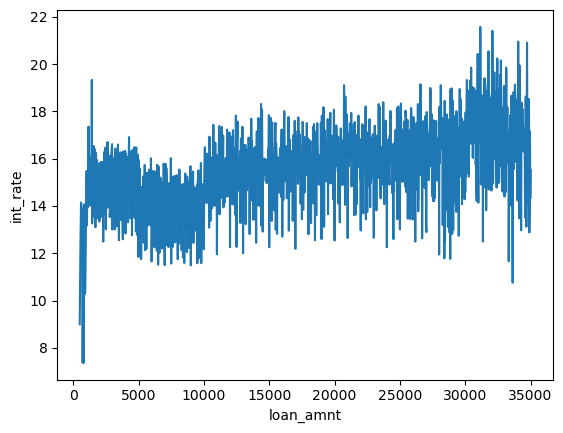

In [29]:
# Bivariate Line Plot
sns.lineplot(x='loan_amnt', y='int_rate', data=df, errorbar=None)

<Axes: xlabel='loan_amnt', ylabel='int_rate'>

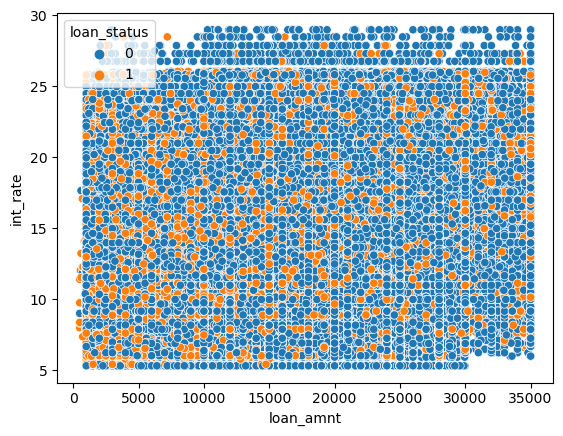

In [30]:
sns.scatterplot(x='loan_amnt', y='int_rate',hue='loan_status', data=df)

In [22]:
# Loan default status is distributed across the range of loan amount and interest rate

In [31]:

# All Available Columns: 'member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'sub_grade', 'term', 'batch_enrolled', 'desc', 'grade', 'emp_length', 'int_rate', 'pymnt_plan', 'initial_list_status', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'verification_status_joint', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status
dfTrain = dfTrain[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']]
dfTest = dfTest[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']]

### Data Preparation

In [32]:

dfTrain.head()

,member_id,loan_amnt,funded_amnt,addr_state,funded_amnt_inv,sub_grade,term,emp_length,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,FL,14350.0,E3,36 months,9 years,19.19,28700.0,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,74.0,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,MD,4800.0,B4,36 months,< 1 year,10.99,65000.0,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,OH,10000.0,A4,36 months,2 years,7.26,45000.0,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,VA,15000.0,D5,36 months,10+ years,19.72,105000.0,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,CA,16000.0,B2,36 months,10+ years,10.64,52000.0,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [33]:

dfTrain['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTest['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTrain['term'] = pd.to_numeric(dfTrain['term'], errors='coerce')
dfTest['term'] = pd.to_numeric(dfTest['term'], errors='coerce')


dfTrain['emp_length'].replace('n/a', '0', inplace=True)
dfTrain['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dfTest['emp_length'].replace('n/a', '0', inplace=True)
dfTest['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dfTrain['emp_length'] = pd.to_numeric(dfTrain['emp_length'], errors='coerce')
dfTest['emp_length'] = pd.to_numeric(dfTest['emp_length'], errors='coerce')


dfTrain['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTest['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTrain['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dfTest['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dfTrain['last_week_pay'] = pd.to_numeric(dfTrain['last_week_pay'], errors='coerce')
dfTest['last_week_pay'] = pd.to_numeric(dfTest['last_week_pay'], errors='coerce')


dfTrain['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTrain['sub_grade'] = pd.to_numeric(dfTrain['sub_grade'], errors='coerce')
dfTest['sub_grade'] = pd.to_numeric(dfTest['sub_grade'], errors='coerce')


In [34]:
#Missing values imputation

cols = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in cols:
    dfTrain[col].fillna(dfTrain[col].median(), inplace=True)
    dfTest[col].fillna(dfTest[col].median(), inplace=True)

cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in cols:
    dfTrain[col].fillna(0, inplace=True)
    dfTest[col].fillna(0, inplace=True)


In [35]:


# Separating the member_id column of test dataframe to help create a csv after predictions
test_member_id = pd.DataFrame(dfTest['member_id'])


# Creating target variable pandas series from train dataframe, this will be used by cross validation to calculate
# the accuracy of the model
train_target = pd.DataFrame(dfTrain['loan_status'])


# It's good to create a copy of train and test dataframes. this way we can play around different features as we tune the
# performance of the classifier with important features
selected_cols = ['member_id', 'emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'mths_since_last_major_derog', 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt', 'recoveries', 'collection_recovery_fee', 'term', 'acc_now_delinq', 'collections_12_mths_ex_med']
finalTrain = dfTrain[selected_cols]
finalTest = dfTest[selected_cols]

# How big the loan a person has taken with respect to his earnings, annual income to loan amount ratio
finalTrain['loan_to_income'] = finalTrain['annual_inc']/finalTrain['funded_amnt_inv']
finalTest['loan_to_income'] = finalTest['annual_inc']/finalTest['funded_amnt_inv']


# All these attributes indicate that the repayment was not all hunky-dory. All the amounts caclulated are ratios 
# like, recovery to the loan amount. This column gives a magnitude of how much the repayment has gone off course 
# in terms of ratios.
finalTrain['bad_state'] = finalTrain['acc_now_delinq'] + (finalTrain['total_rec_late_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['recoveries']/finalTrain['funded_amnt_inv']) + (finalTrain['collection_recovery_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTrain['funded_amnt_inv'])
finalTest['bad_state'] = finalTest['acc_now_delinq'] + (finalTest['total_rec_late_fee']/finalTest['funded_amnt_inv']) + (finalTest['recoveries']/finalTest['funded_amnt_inv']) + (finalTest['collection_recovery_fee']/finalTest['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTest['funded_amnt_inv'])

# For the sake of this model, I have used just a boolean flag if things had gone bad, with this case I didn't see
# a benifit of including above computations
finalTrain.loc[finalTrain['bad_state'] > 0, 'bad_state'] = 1
finalTest.loc[finalTest['bad_state'] > 0, 'bad_state'] = 1


# Total number of available/unused 'credit lines'
finalTrain['avl_lines'] = finalTrain['total_acc'] - finalTrain['open_acc']
finalTest['avl_lines'] = finalTest['total_acc'] - finalTest['open_acc']


# Interest paid so far
finalTrain['int_paid'] = finalTrain['total_rec_int'] + finalTrain['total_rec_late_fee']
finalTest['int_paid'] = finalTest['total_rec_int'] + finalTest['total_rec_late_fee']


# Calculating EMIs paid (in terms of percent)
finalTrain['emi_paid_progress_perc'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100)
finalTest['emi_paid_progress_perc'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100)


# Calculating total repayments received so far, in terms of EMI or recoveries after charge off
finalTrain['total_repayment_progress'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100) + ((finalTrain['recoveries']/finalTrain['funded_amnt_inv']) * 100)
finalTest['total_repayment_progress'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100) + ((finalTest['recoveries']/finalTest['funded_amnt_inv']) * 100)

In [ ]:
df_num=df.select_dtypes(include='number')

# function to remove outlier
def outlier_remover(df_num,df):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR=df_num.quantile(0.75)-df_num.quantile(0.25)
    lower_bound = Q1-IQR
    upper_bound=Q3+IQR
    df=df[~((df_num<lower_bound)|(df_num>upper_bound)).any(axis=1)]
    return df

df =outlier_remover(df_num,df)

In [36]:
finalTrain.head()

,member_id,emp_length,loan_amnt,funded_amnt,funded_amnt_inv,sub_grade,int_rate,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,mths_since_last_major_derog,last_week_pay,tot_cur_bal,total_rev_hi_lim,tot_coll_amt,recoveries,collection_recovery_fee,term,acc_now_delinq,collections_12_mths_ex_med,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,total_repayment_progress
0,58189336,9.0,14350,14350,14350.0,43,19.19,28700.0,33.88,50.0,75.0,14.0,22515.0,73.1,28.0,1173.84,0.0,74.0,26.0,28699.0,30800.0,0.0,0.0,0.0,36,0.0,0.0,2.000000,0.0,14.0,1173.84,16.560510,16.560510
1,70011223,0.0,4800,4800,4800.0,14,10.99,65000.0,3.64,31.0,70.0,6.0,7624.0,23.2,13.0,83.95,0.0,44.0,9.0,9974.0,32900.0,0.0,0.0,0.0,36,0.0,0.0,13.541667,0.0,7.0,83.95,5.732484,5.732484
2,70255675,2.0,10000,10000,10000.0,4,7.26,45000.0,18.42,31.0,70.0,5.0,10877.0,31.2,19.0,56.47,0.0,44.0,9.0,38295.0,34900.0,65.0,0.0,0.0,36,0.0,0.0,4.500000,0.0,14.0,56.47,5.732484,5.732484
3,1893936,10.0,15000,15000,15000.0,35,19.72,105000.0,14.97,46.0,70.0,10.0,13712.0,55.5,21.0,4858.62,0.0,44.0,135.0,55564.0,24700.0,0.0,0.0,0.0,36,0.0,0.0,7.000000,0.0,11.0,4858.62,85.987261,85.987261
4,7652106,10.0,16000,16000,16000.0,12,10.64,52000.0,20.16,31.0,70.0,11.0,35835.0,76.2,27.0,2296.41,0.0,44.0,96.0,47159.0,47033.0,0.0,0.0,0.0,36,0.0,0.0,3.250000,0.0,16.0,2296.41,61.146497,61.146497


In [37]:
train_target.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [38]:
finalTrain.dropna(inplace=True)

In [39]:
X = finalTrain.copy()
y = train_target.copy()

In [41]:

scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X)

In [42]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X.columns, index=X.index)

In [43]:
X_num_scaled.describe()

,member_id,emp_length,loan_amnt,funded_amnt,funded_amnt_inv,sub_grade,int_rate,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,mths_since_last_major_derog,last_week_pay,tot_cur_bal,total_rev_hi_lim,tot_coll_amt,recoveries,collection_recovery_fee,term,acc_now_delinq,collections_12_mths_ex_med,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,total_repayment_progress
count,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,532289.000000,5.322890e+05,532289.000000,532289.000000,532289.000000,532289.000000,5.322890e+05
mean,0.475595,0.601057,0.413329,0.412947,0.420250,0.311556,0.334742,0.007773,0.026973,0.180507,0.578629,0.128291,0.006587,0.061705,0.150736,0.072450,0.001098,0.244613,0.190434,0.016865,0.003142,0.000396,0.001363,0.000692,0.299903,0.000358,0.000894,4.590402e-06,0.055964,0.128067,0.072466,0.168561,2.800049e-06
std,0.328252,0.357151,0.244470,0.244313,0.241116,0.202707,0.185040,0.006865,0.012444,0.085366,0.091337,0.059016,0.008729,0.026723,0.073559,0.086483,0.011379,0.061641,0.144387,0.018573,0.003660,0.003787,0.012214,0.008989,0.458216,0.005652,0.008313,1.486673e-03,0.229852,0.058451,0.086499,0.133911,1.408212e-03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.146968,0.300000,0.217391,0.217391,0.228571,0.171875,0.197296,0.004611,0.017739,0.172222,0.578512,0.088889,0.002509,0.042250,0.099379,0.018248,0.000000,0.244444,0.072368,0.004026,0.001470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.119101e-09,0.000000,0.084416,0.018257,0.061340,3.306007e-08
50%,0.503942,0.600000,0.362319,0.362319,0.371429,0.312500,0.324039,0.006717,0.026259,0.172222,0.578512,0.122222,0.004623,0.062759,0.142857,0.044326,0.000000,0.244444,0.157895,0.010084,0.002370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.034838e-08,0.000000,0.116883,0.044337,0.128289,6.139728e-08
75%,0.795226,1.000000,0.565217,0.565217,0.571429,0.468750,0.459654,0.009349,0.035612,0.172222,0.578512,0.155556,0.008114,0.082483,0.192547,0.092349,0.000000,0.244444,0.273026,0.024509,0.003790,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.629320e-08,0.000000,0.162338,0.092372,0.243421,1.162006e-07
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00


In [54]:
X=X_num_scaled

In [55]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [56]:
X.isna().sum()

member_id                      0
emp_length                     0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
sub_grade                      0
int_rate                       0
annual_inc                     0
dti                            0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
revol_bal                      0
revol_util                     0
total_acc                      0
total_rec_int                  0
total_rec_late_fee             0
mths_since_last_major_derog    0
last_week_pay                  0
tot_cur_bal                    0
total_rev_hi_lim               0
tot_coll_amt                   0
recoveries                     0
collection_recovery_fee        0
term                           0
acc_now_delinq                 0
collections_12_mths_ex_med     0
loan_to_income                 0
bad_state                      0
avl_lines                      0
int_paid  

In [57]:
# Find and drop rows with null values in X_train
X = X.dropna()

# Drop corresponding rows from y_train based on the index of the dropped rows in X_train
y = y.loc[X.index]

# Reset the index of both data frames
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_pred = model.predict(X_test)

In [61]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [62]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[77249,  4139],
       [ 9885, 15185]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

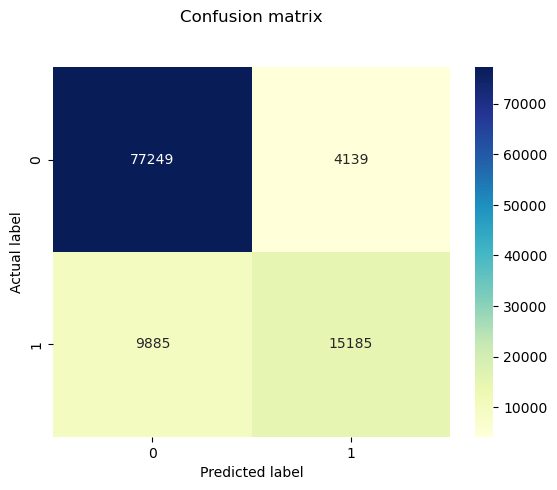

In [63]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)



0.8682672979015198

In [65]:
target_names = ['will NOT default', 'will default']
print(classification_report(y_test, y_pred,target_names=target_names))

                  precision    recall  f1-score   support

will NOT default       0.89      0.95      0.92     81388
    will default       0.79      0.61      0.68     25070

        accuracy                           0.87    106458
       macro avg       0.84      0.78      0.80    106458
    weighted avg       0.86      0.87      0.86    106458



In [66]:
auc_score=roc_auc_score(y_test,y_pred)

In [67]:
auc_score

0.777424432898152